In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import geopandas as gpd
import geojson
from shapely.geometry import Point, LineString
import flexpolyline
import folium

In [2]:
print('Привет, мой друг! Вы любите бегать? Мы - нет, но для Вас есть 3 варианта пробежки: рыба, летучая мышь и хот-дог.')
print('Введите fish, mouse или dog.')

Привет, мой друг! Вы любите бегать? Мы - нет, но для Вас есть 3 варианта пробежки: рыба, летучая мышь и хот-дог.
Введите fish, mouse или dog.


In [3]:
pic = input()

img = cv2.imread(pic + '.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.0001, 10)
corners = np.int0(corners)

mouse


In [4]:
squeezed = corners.squeeze().tolist()
print(squeezed)

[[261, 232], [144, 167], [2, 257], [353, 187], [364, 232], [137, 353], [623, 259], [485, 352], [311, 456], [271, 187], [292, 225], [335, 225], [489, 167], [391, 357], [66, 268], [603, 233], [99, 290], [151, 183], [332, 413], [302, 433], [524, 293], [616, 247], [471, 190], [17, 237], [582, 260], [454, 205], [162, 348], [363, 376], [118, 313], [81, 276], [570, 205], [167, 200], [581, 214], [286, 405], [352, 386], [521, 176], [511, 309], [176, 207], [437, 216], [284, 215], [302, 222], [556, 195], [91, 282], [78, 192], [196, 218], [483, 176], [50, 209], [231, 356], [213, 225], [493, 339], [132, 341], [402, 352], [272, 386], [555, 269], [344, 396], [126, 328], [117, 174], [544, 276], [251, 369], [208, 348], [503, 322], [265, 207], [59, 203], [10, 245], [261, 376], [320, 434], [464, 347], [36, 220], [404, 228], [360, 209], [501, 169], [150, 350], [280, 396], [610, 259], [420, 347], [106, 179], [43, 261], [318, 221], [379, 232], [158, 192], [241, 362], [566, 264], [533, 284], [129, 170], [278

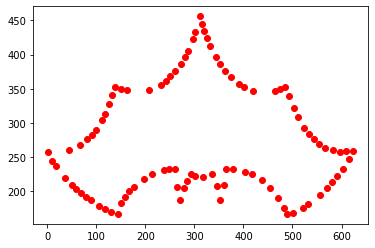

In [5]:
squeezed = corners.squeeze().tolist()
x_squeezed = np.array([i[0] for i in squeezed])
y_squeezed = np.array([i[1] for i in squeezed])

plt.plot(x_squeezed, y_squeezed, 'ro')

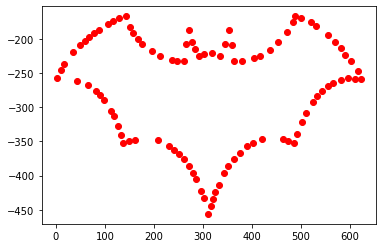

In [6]:
plt.plot(x_squeezed, -y_squeezed, 'ro')

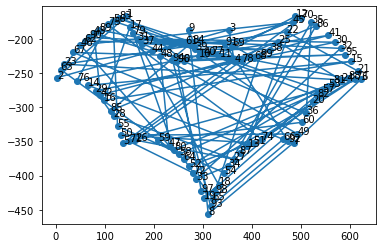

In [7]:
matrix = np.array([x_squeezed, -y_squeezed])

plt.plot(matrix[0], matrix[1], marker='o')
for index, coord in enumerate(matrix[0]):
    plt.text(coord, matrix[1][index], str(index))

In [9]:
def distance(P1, P2):
    """
    This function computes the distance between 2 points defined by
     P1 = (x1,y1) and P2 = (x2,y2) 
    """
    return ((P1[0] - P2[0])**2 + (P1[1] - P2[1])**2) ** 0.5


def optimized_path(coords, start=None):
    """
    This function finds the nearest point to a point
    coords should be a list in this format coords = [ [x1, y1], [x2, y2] , ...] 

    """
    if start is None:
        start = coords[0]
    pass_by = coords
    path = [start]
    pass_by.remove(start)
    while pass_by:
        nearest = min(pass_by, key=lambda x: distance(path[-1], x))
        path.append(nearest)
        pass_by.remove(nearest)
    return path


In [10]:
print(squeezed)

[[261, 232], [144, 167], [2, 257], [353, 187], [364, 232], [137, 353], [623, 259], [485, 352], [311, 456], [271, 187], [292, 225], [335, 225], [489, 167], [391, 357], [66, 268], [603, 233], [99, 290], [151, 183], [332, 413], [302, 433], [524, 293], [616, 247], [471, 190], [17, 237], [582, 260], [454, 205], [162, 348], [363, 376], [118, 313], [81, 276], [570, 205], [167, 200], [581, 214], [286, 405], [352, 386], [521, 176], [511, 309], [176, 207], [437, 216], [284, 215], [302, 222], [556, 195], [91, 282], [78, 192], [196, 218], [483, 176], [50, 209], [231, 356], [213, 225], [493, 339], [132, 341], [402, 352], [272, 386], [555, 269], [344, 396], [126, 328], [117, 174], [544, 276], [251, 369], [208, 348], [503, 322], [265, 207], [59, 203], [10, 245], [261, 376], [320, 434], [464, 347], [36, 220], [404, 228], [360, 209], [501, 169], [150, 350], [280, 396], [610, 259], [420, 347], [106, 179], [43, 261], [318, 221], [379, 232], [158, 192], [241, 362], [566, 264], [533, 284], [129, 170], [278

In [11]:
path = optimized_path(squeezed)
print(path)

[[261, 232], [248, 233], [238, 231], [213, 225], [196, 218], [176, 207], [167, 200], [158, 192], [151, 183], [144, 167], [129, 170], [117, 174], [106, 179], [88, 187], [78, 192], [68, 198], [59, 203], [50, 209], [36, 220], [17, 237], [10, 245], [2, 257], [43, 261], [66, 268], [81, 276], [91, 282], [99, 290], [112, 305], [118, 313], [126, 328], [132, 341], [137, 353], [150, 350], [162, 348], [208, 348], [231, 356], [241, 362], [251, 369], [261, 376], [272, 386], [280, 396], [286, 405], [297, 423], [302, 433], [320, 434], [325, 424], [332, 413], [344, 396], [352, 386], [363, 376], [375, 367], [391, 357], [402, 352], [420, 347], [464, 347], [474, 350], [485, 352], [493, 339], [503, 322], [511, 309], [524, 293], [533, 284], [544, 276], [555, 269], [566, 264], [582, 260], [596, 258], [610, 259], [623, 259], [616, 247], [603, 233], [591, 223], [581, 214], [570, 205], [556, 195], [531, 181], [521, 176], [501, 169], [489, 167], [483, 176], [471, 190], [454, 205], [437, 216], [417, 225], [404, 

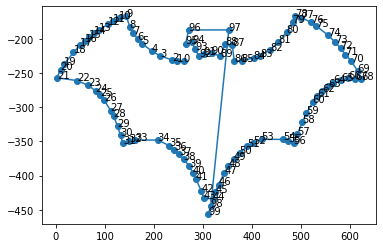

In [12]:
import numpy as np
x = np.array([i[0] for i in path])
y = np.array([i[1] for i in path])

matrix = np.array([x, -y])

plt.plot(matrix[0], matrix[1], marker='o')
for index, coord in enumerate(matrix[0]):
    plt.text(coord, matrix[1][index], str(index))

In [22]:
meters=70
# Координаты в системе координат EPSG:3857
x_original_point = float(input())
y_original_point = float(input())


mx = x * meters + x_original_point
my = y * -meters + y_original_point

mxy = list(zip(mx,my))
picture_df = gpd.GeoDataFrame(
    {'id': range(0, len(mxy))}, 
    crs="EPSG:3857", 
    geometry=[Point(resu) for resu in mxy]
)

picture_df['geometry'] = picture_df['geometry'].to_crs(epsg=4326)
picture_df.to_file(pic+'.geojson', driver='GeoJSON', encoding="utf-8")


6468378
6978965


c:\users\blayz\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [23]:
import geojson
SERVICE = 'https://router.hereapi.com/v8/routes?apiKey=sbsPgXUqrtca4-EMRcAPnBVu5zk2FfMUrwHdvvVjESU&transportMode=pedestrian&return=polyline'
file = open(pic+'.geojson')
data = geojson.load(file).copy()
file.close()


In [24]:
coords_list = [feature['geometry']['coordinates'] for feature in data['features']]



In [25]:
start_point = coords_list[0]
destination_point = coords_list[len(coords_list) -1]

coords_list.remove(start_point)
coords_list.remove(destination_point)

In [26]:
origin = f'&origin={start_point[1]},{start_point[0]}'
destination = f'&destination={destination_point[1]},{destination_point[0]}&'
waypoints = '&'.join([f'via={coords[1]},{coords[0]}' for coords in coords_list])

In [27]:
import requests
routes = requests.get(SERVICE + origin + destination + waypoints).json()
#routes.url


In [28]:
def decode (section):
    line = flexpolyline.decode(section['polyline'])
    line = [(coord[1], coord[0])  for coord in line]
    return LineString(line)

geometry = [ decode(section) for section in routes['routes'][0]['sections']]

In [29]:
route_df = gpd.GeoDataFrame(geometry=geometry)

route_df.to_file("route.geojson", driver='GeoJSON', encoding="utf-8")

In [30]:
m = folium.Map(
        location=[55.846683487402089, 37.501707654705264], 
        zoom_start=15,
        tiles='https://1.base.maps.ls.hereapi.com/maptile/2.1/maptile/newest/reduced.day/{z}/{x}/{y}/256/png?lg=RU&apiKey=EMBSXg2f0eFH2OruWze6lhWjxGxo-UI6m5DxuTUIL9I',
        attr='HERE'
    )

folium.GeoJson(pic + '.geojson', name="geojson").add_to(m)
folium.GeoJson('route.geojson', name="geojson").add_to(m)
m.save('map1.html')